# Set UP Modules

In [125]:
!pwd

/net/fs03/d1/tzd/Data_analysis/RAworkflow


In [8]:
#https://www.youtube.com/watch?v=XjCPUkYc62Q

In [1]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose

In [133]:
import os
os.chdir('/home/tzd/fs03/d1/tzd/Data_analysis/RAworkflow')
%run ./My_Modules/DataSetUP10VAR.ipynb
#FmodelDF
# getNoASGM():       => Hg0no_ASGM dataframe; in correct units
# get_model(region): => Hg0_modified; in correct units (takes gridbox region in Peru as input)
# getLoRes():        => Hg0 baseline with ASGM low resulution in correct units
# getHiRes():        => Hg0 baseline with ASGM high resulution in correct units  
# getNoASGM():       => Hg0 baseline without ASGM low resulution in correct units  
# get_obs_d():       => obs_Hg0; original observations daily mean values
# get_detrended_obs(): => Obs_detrended; return detrended observations
# get_detrended_model(model): => This function takes in a dataframe of model outputs and returns the detrended version of that model output
# getIQR_Dd(model): This function takes in a dataframe of model outputs and returns the detrended IQR 
# getIQR(model): => This function takes in a dataframe of model outputs and returns the IQR

boxes().shape[0]
# getNoASGM():       => Hg0no_ASGM dataframe; in correct units
# get_model(region): => Hg0_modified; in correct units (takes gridbox region in Peru as input)
# getLoRes():        => Hg0 baseline with ASGM low resulution in correct units
# getHiRes():        => Hg0 baseline with ASGM high resulution in correct units
# getNoASGM():       => Hg0 baseline without ASGM low resulution in correct units
# get_obs_d():       => obs_Hg0; original observations daily mean values
# get_detrended_obs(): => Obs_detrended; return detrended observations
# get_detrended_model(model): => This function takes in a dataframe of model outputs 
                                and returns the detrended version of that model output
# getObsIQR(obs): This function takes observations and returns the IQR 
# getIQR_Dd(model): This function takes in a dataframe of model outputs and returns the detrended IQR
# getIQR(model): => This function takes in a dataframe of model outputs and returns the IQR
#

# Characteristics Time Series

## Characteristics of Observation Time Series

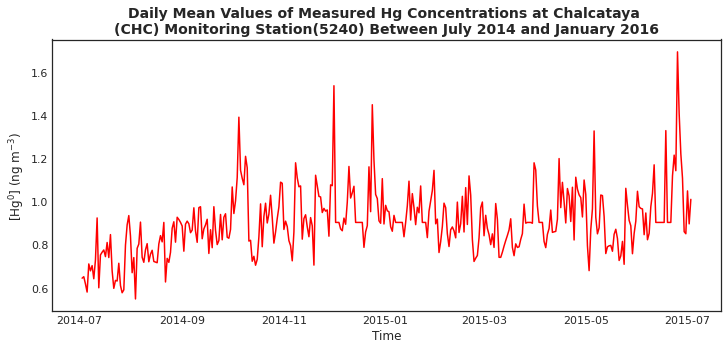

In [3]:
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)
Title='Daily Mean Values of Measured Hg Concentrations at Chalcataya \n(CHC) Monitoring Station(5240) Between July 2014 and January 2016'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'
plt_data=get_obs_d().value

ax.plot(plt_data,color = 'red',label = 'Observations')
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
# plt.legend()
plt.show()

A.M. Koenig et al. assert that the last 9 months of the measurement period was affected by ENSO hence 

In [4]:
#observations under normal conditions
obs_nc=get_obs_d()[:'2015-07-03']

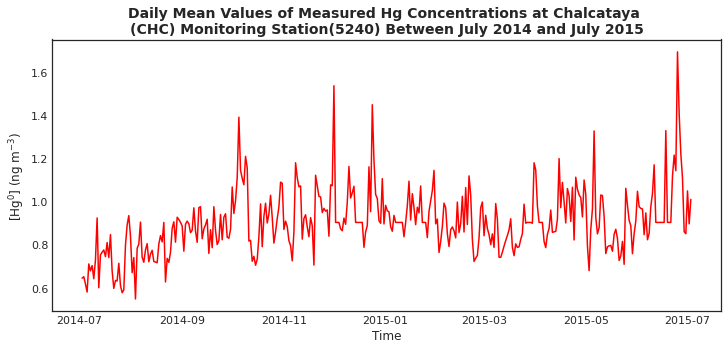

In [5]:
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)
Title='Daily Mean Values of Measured Hg Concentrations at Chalcataya \n(CHC) Monitoring Station(5240) Between July 2014 and July 2015'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'
plt_data=obs_nc.value

ax.plot(plt_data,color = 'red',label = 'Observations')
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
# plt.legend()
plt.show()

In [6]:

obs=obs_nc
obs.index = pd.to_datetime(obs.index)

In [7]:
results = seasonal_decompose(obs, model='additive',period=30)

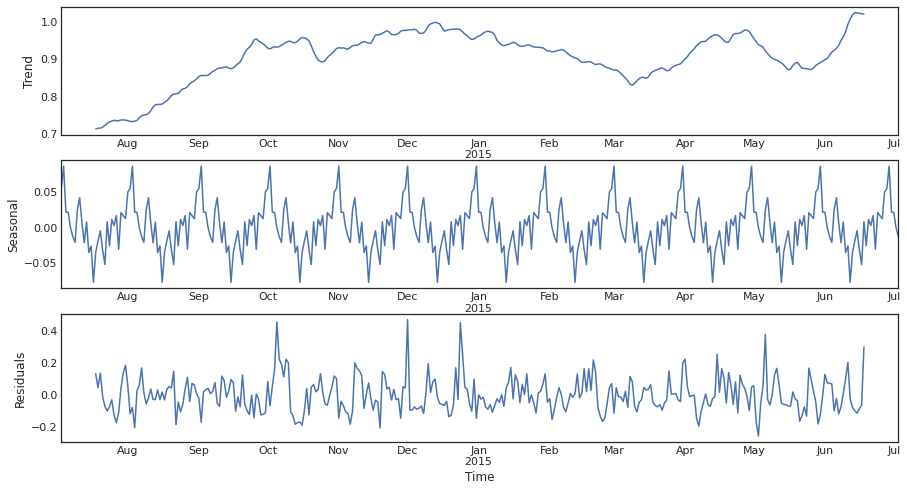

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
results.trend.plot(ax=ax1)
ax1.set(ylabel='Trend')
results.seasonal.plot(ax=ax2)
ax2.set(ylabel='Seasonal')
results.resid.plot(ax=ax3)
ax3.set(ylabel='Residuals')
plt.xlabel('Time')
plt.show()

Based on the trend plot in the figure above, there appears to be an overall upwards trend in the observed mercury concentration over the two years in which the data was recorded

We can see that there is definite seasonality in the data, causing prices to fluctuate by 0.2 over the course of a month.

The residual plot show us that there is randomness in the observed concentration of Hg in the atmosphere

Next we weill create the same plot for the model output tio figure out if GEOS Chem captures all these characteristic of the observed data


## Characteristics of Model Time Series

In [9]:
GCno_asgm=getNoASGM()[:'2015-07-03']
GC_asgm=getLoRes()[:'2015-07-03']

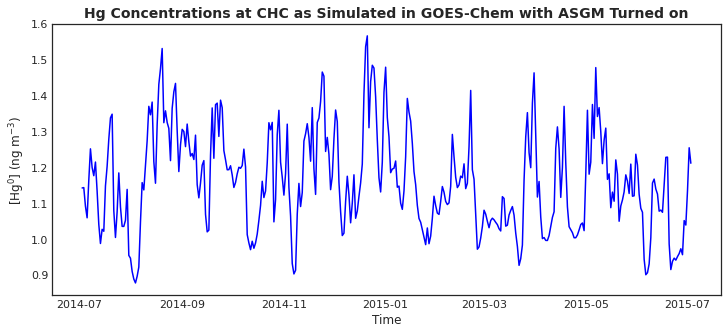

In [10]:
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)
Title='Hg Concentrations at CHC as Simulated in GOES-Chem with ASGM Turned on'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'
plt_data=GC_asgm.SpeciesConc_Hg0

ax.plot(plt_data,color = 'blue',label = 'Reference Simulation \nwith ASGM Turned on')
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
#plt.legend()
plt.show()

In [11]:
GC_asgm.index = pd.to_datetime(GC_asgm.index)

In [12]:
results_model = seasonal_decompose(GC_asgm, model='additive',period=30)

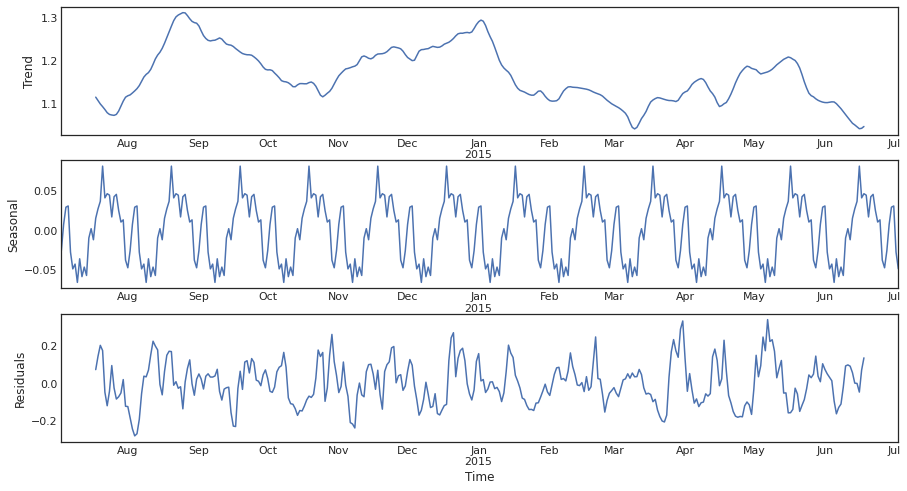

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
results_model.trend.plot(ax=ax1)
ax1.set(ylabel='Trend')
results_model.seasonal.plot(ax=ax2)
ax2.set(ylabel='Seasonal')
results_model.resid.plot(ax=ax3)
ax3.set(ylabel='Residuals')
plt.xlabel('Time')
plt.show()

Based on the trend plot in the figure above, there appears to be no overall upwards or downward trend in the modelled mercury concentration over the two years simulated in GEOS Chem

We can see that there is definite seasonality in the data, causing prices to fluctuate by 0.125 over the course of a month.

The residual plot shows us that there is randomness in the modelled concentration of Hg in the atmosphere

Next we weill create the same plot for the model output tio figure out if GEOS Chem captures all these characteristic of the observed data

# Comparison of Time Series

## Plot of time series before detrending 

In [144]:
!ls

'5D Analysis'		     My_Modules
'5D Comparison Plots'	    'node files'
 GMA2018		     nodejs
 Hg_dataset_practice	     OldAnalysis
 LICENSE		     opti2.png
 MCMC_Initial_Analysis	     opti3.png
 MCMC_Multisite		     opti4.png
'MCMC Plots with error'     'Optimization with Synthetic Data'
 MCMC_Refactored_Notebooks   Plots
'MCMC Step 3 Plots'	     __pycache__
'ML HW'			     README.md
 ModelvObservations


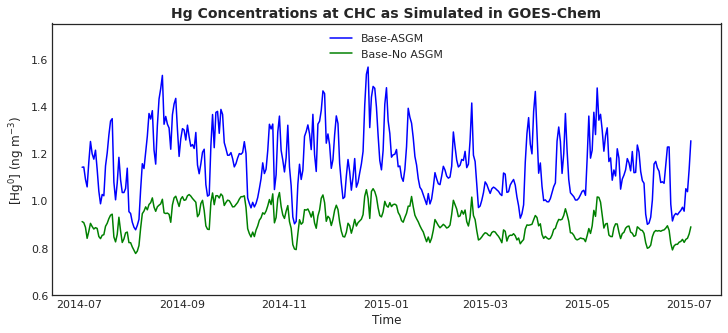

In [149]:
#Set Up figure
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)

#define labels
Title='Hg Concentrations at CHC as Simulated in GOES-Chem'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'

#define data
plt_data1=GCno_asgm.SpeciesConc_Hg0
plt_data2=GC_asgm.SpeciesConc_Hg0

#Plots
ax.plot(plt_data2,color = 'blue',label = 'Base-ASGM')
ax.plot(plt_data1,color = 'green',label = 'Base-No ASGM')
#Turn on labels 
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
plt.legend(loc=9)
plt.ylim(0.6, 1.75)
plt.show()
fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_ASGMvNoASGM.png')
#fs03/d1/tzd/Data_analysis/RAworkflow/MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/ModelvsObs_v1.png

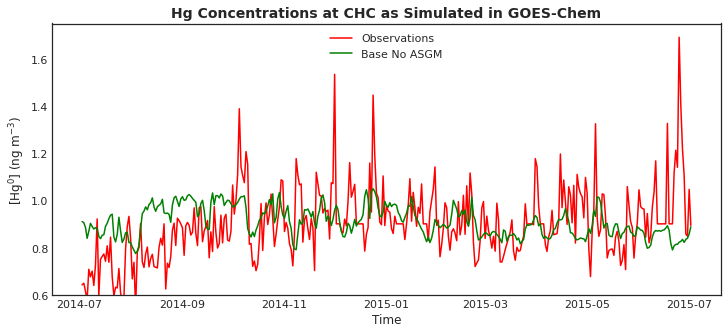

In [161]:
#Set Up figure
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)

#define labels
Title='Hg Concentrations at CHC as Simulated in GOES-Chem'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'

#define data
plt_data1=GCno_asgm.SpeciesConc_Hg0
plt_data2=obsNC.value
#Plots
ax.plot(plt_data2,color = 'red',label = 'Observations')
ax.plot(plt_data1,color = 'green',label = 'Base No ASGM')
#Turn on labels 
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
plt.legend(loc=9)
plt.ylim(0.6, 1.75)
plt.show()
fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_ObsvNoASGMv1.png')

According to the plot above we can tell that GEOS-Chem attributes the Hg concentration at Chalcataya to ASGM emissions.

Consequently, we can conclude that the model asserts that the Hg concentration in the atmosphere at Chalcataya is mostly due to Hg emissions from ASGM activities in the surrounding reagion. if we trust the GEOS-Chem models prediction of the Hg concentrations, we may use it to explaint he observed concentrations in the atmosphere. 

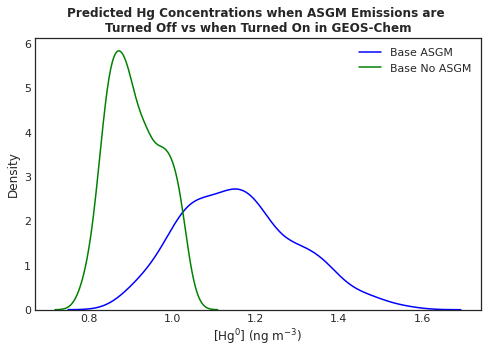

In [162]:

fig=plt.figure(figsize=(8,5))
plt.title('Predicted Hg Concentrations when ASGM Emissions are \nTurned Off vs when Turned On in GEOS-Chem',size=12,fontweight="bold")
sns.kdeplot(data=GC_asgm.SpeciesConc_Hg0, fill=False,color = 'blue',label = 'Base ASGM')#,bw_adjust=0.5)
sns.kdeplot(data=GCno_asgm.SpeciesConc_Hg0, fill=False,color = 'green',label = 'Base No ASGM')#,bw_adjust=0.5)
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()
fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_ASGMvNoASGM_histv1.png')

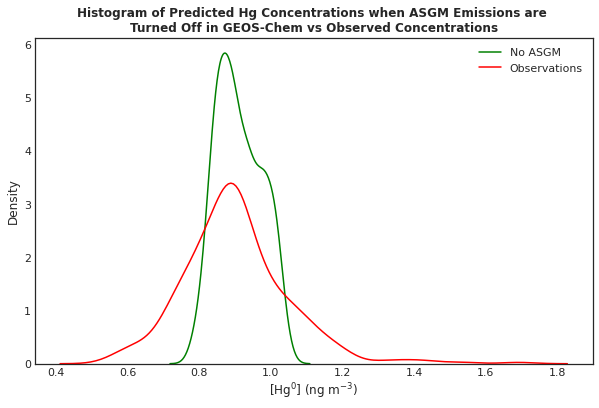

In [163]:

fig=plt.figure(figsize=(10,6))
plt.title('Histogram of Predicted Hg Concentrations when ASGM Emissions are \nTurned Off in GEOS-Chem vs Observed Concentrations',size=12,fontweight="bold")
sns.kdeplot(data=GCno_asgm.SpeciesConc_Hg0, fill=False,color = 'green',label = 'No ASGM')#,bw_adjust=0.5)
sns.kdeplot(data=obsNC.value, fill=False,color = 'red',label = 'Observations')#,bw_adjust=0.5)
plt.legend(loc='best')
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()
fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_ObsvNoASGMv1.png')

## How do the observed concentrations in the Atmosphere compare with the modeled Hg concentrations

In [20]:
obsNC=obs_nc
GC_asgmNC=GC_asgm

### Comparison of Montlhy means

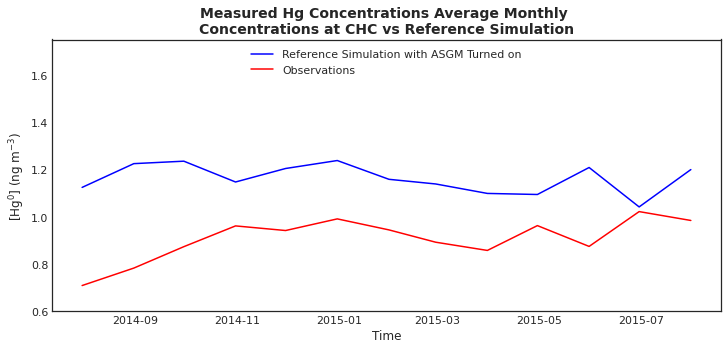

In [21]:
#Set Up figure
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)

#define labels
Title='Measured Hg Concentrations Average Monthly \nConcentrations at CHC vs Reference Simulation'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'

#define data
plt_data1=obsNC.resample('M').mean()['value']
plt_data2=GC_asgmNC.resample('M').mean()['SpeciesConc_Hg0']

#Plots
ax.plot(plt_data2,color = 'blue',label = 'Reference Simulation with ASGM Turned on')
ax.plot(plt_data1,color = 'red',label = 'Observations')
#Turn on labels 
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
plt.legend(loc=9)
plt.ylim(0.6, 1.75)
plt.show()

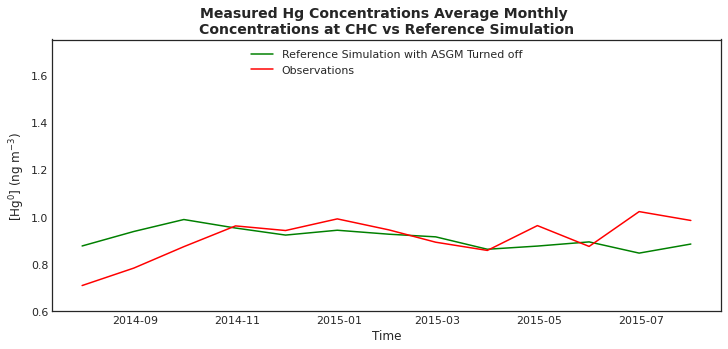

In [22]:
#Set Up figure
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)

#define labels
Title='Measured Hg Concentrations Average Monthly \nConcentrations at CHC vs Reference Simulation'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'

#define data
plt_data1=obsNC.resample('M').mean()['value']
plt_data2=GCno_asgm.resample('M').mean()['SpeciesConc_Hg0']

#Plots
ax.plot(plt_data2,color = 'green',label = 'Reference Simulation with ASGM Turned off')
ax.plot(plt_data1,color = 'red',label = 'Observations')
#Turn on labels 
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
plt.legend(loc=9)
plt.ylim(0.6, 1.75)
plt.show()

## Further Comparison of Time series

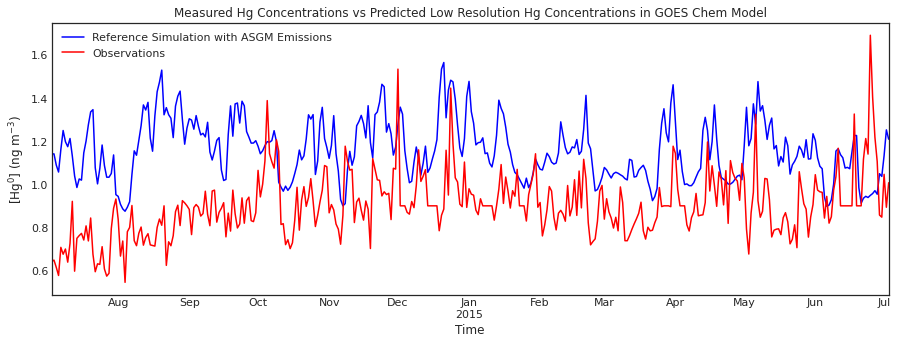

In [23]:
plt.figure(figsize=(15,5))
plt.title('Measured Hg Concentrations vs Predicted Low Resolution Hg Concentrations in GOES Chem Model')
GC_asgm.SpeciesConc_Hg0.plot(color = 'blue',label = 'Reference Simulation with ASGM Emissions ')
obs.value.plot(color = 'red',label = 'Observations')
plt.legend()
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('Time')
plt.show()

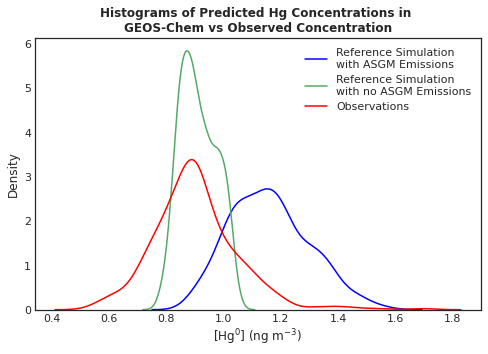

In [55]:
#GCno_asgm
plt.figure(figsize=(8,5))
plt.title('Histograms of Predicted Hg Concentrations in \nGEOS-Chem vs Observed Concentration',size=12,fontweight="bold")
sns.kdeplot(data=GC_asgmNC.SpeciesConc_Hg0, fill=False,color = 'blue',label = 'Reference Simulation \nwith ASGM Emissions')#,bw_adjust=0.5)
sns.kdeplot(data=GCno_asgm.SpeciesConc_Hg0, fill=False,color = 'g',label = 'Reference Simulation \nwith no ASGM Emissions')#,bw_adjust=0.5)
sns.kdeplot(data=obsNC.value, fill=False,color = 'red',label = 'Observations')
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()

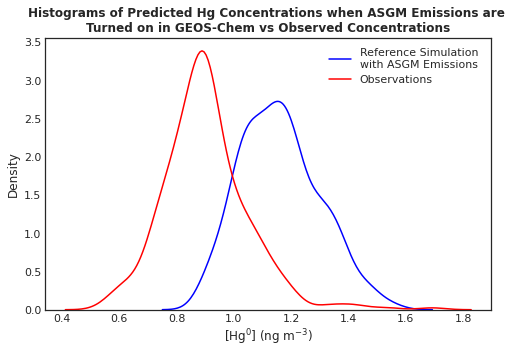

In [58]:
#GCno_asgm
plt.figure(figsize=(8,5))
plt.title('Histograms of Predicted Hg Concentrations when ASGM Emissions are \nTurned on in GEOS-Chem vs Observed Concentrations',size=12,fontweight="bold")
sns.kdeplot(data=GC_asgmNC.SpeciesConc_Hg0, fill=False,color = 'blue',label = 'Reference Simulation \nwith ASGM Emissions')#,bw_adjust=0.5)
sns.kdeplot(data=obsNC.value, fill=False,color = 'red',label = 'Observations')#,bw_adjust=0.5)
#sns.kdeplot(data=GCno_asgm.SpeciesConc_Hg0, fill=False,color = 'g',label = 'Reference Simulation \nwith no ASGM Emissions',bw_adjust=0.5)
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()

In [59]:
df_comb_mod=pd.merge(GCno_asgm,GC_asgmNC,  left_index=True, right_index=True)
df_comb=pd.merge(df_comb_mod, obsNC, left_index=True, right_index=True)
df_comb.columns=['GC_noASGM','GC_ASGM','Observations']
df_comb

,GC_noASGM,GC_ASGM,Observations
time,,,
2014-07-03,0.911956,1.141870,0.644308
2014-07-04,0.907401,1.142869,0.651114
2014-07-05,0.887611,1.091087,0.617688
2014-07-06,0.841053,1.058690,0.579989
2014-07-07,0.870472,1.162876,0.710160
...,...,...,...
2015-06-29,0.836476,1.050984,0.859547
2015-06-30,0.841379,1.038522,0.849968
2015-07-01,0.859729,1.134310,1.048141


<AxesSubplot:>

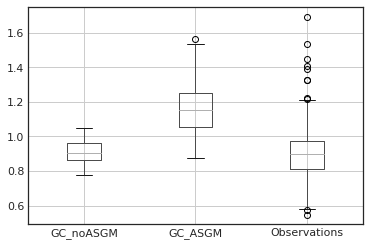

In [60]:
df_comb.boxplot()

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
GC_noasgm_st = scaler.fit_transform(GCno_asgm)
GC_asgm_st = scaler.fit_transform(GC_asgmNC)
obsNC_st = scaler.fit_transform(obsNC)

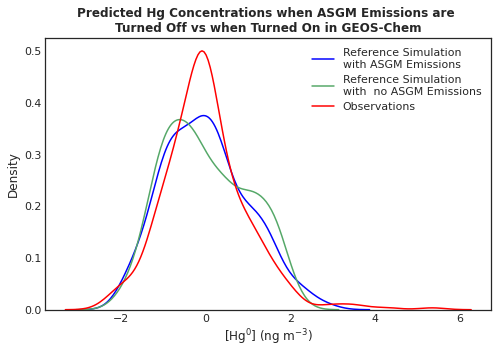

In [62]:
fig, ax = plt.subplots(figsize=(8,5))
#plt.figure(figsize=(8,5))
plt.title('Standardized Predicted Hg Concentrations when ASGM Emissions are \nTurned Off vs when Turned On in GEOS-Chem',size=12,fontweight="bold")
sns.kdeplot(data=GC_asgm_st.squeeze(),ax =ax,color = 'blue', fill=False,label ='Reference Simulation \nwith ASGM Emissions')#,bw_adjust=0.5)
sns.kdeplot(data=GC_noasgm_st.squeeze(),ax =ax,color = 'g', fill=False,label = 'Reference Simulation \nwith  no ASGM Emissions')#,bw_adjust=0.5)
sns.kdeplot(data=obsNC_st.squeeze(),ax =ax,color = 'red', fill=False,label = 'Observations')#,bw_adjust=0.5)
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()

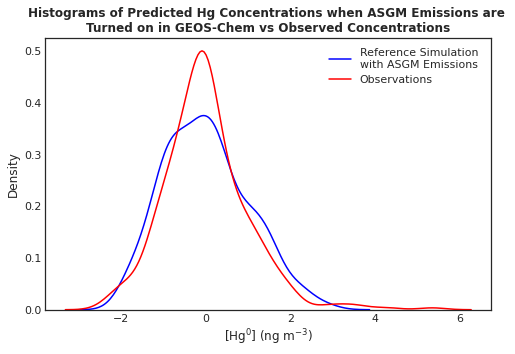

In [63]:
fig, ax = plt.subplots(figsize=(8,5))
#plt.figure(figsize=(8,5))
plt.title('Histograms of Predicted Hg Concentrations when ASGM Emissions are \nTurned on in GEOS-Chem vs Observed Concentrations',size=12,fontweight="bold")
sns.kdeplot(data=GC_asgm_st.squeeze(),ax =ax,color = 'blue', fill=False,label ='Reference Simulation \nwith ASGM Emissions')#,bw_adjust=0.5)
#sns.kdeplot(data=GC_noasgm_st.squeeze(),ax =ax,color = 'g', fill=False,label = 'Reference Simulation \nwith  no ASGM Emissions',bw_adjust=0.5)
sns.kdeplot(data=obsNC_st.squeeze(),ax =ax,color = 'red', fill=False,label = 'Observations')#,bw_adjust=0.5)
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()

In [64]:
df_comb_st=df_comb[:]

In [65]:
#df_comb.columns=['GC_noASGM','GC_ASGM','Observations']
df_comb_st['GC_noASGM']=GC_noasgm_st
df_comb_st['GC_ASGM']=GC_asgm_st
df_comb_st['Observations']=obsNC_st

<AxesSubplot:>

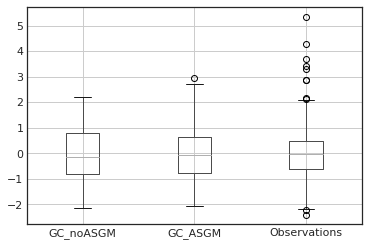

In [66]:
df_comb_st.boxplot()

In [36]:
myMax=max(max(obsNC.value),max(GC_asgmNC.SpeciesConc_Hg0))

# Find Correlation

In [67]:
from scipy import stats
corr=stats.spearmanr(obsNC.value, GC_asgmNC.SpeciesConc_Hg0)
# from scipy import stats
# stats.spearmanr([1,2,3,4,5], [5,6,7,8,7])
corr[0]

0.12530069963002954

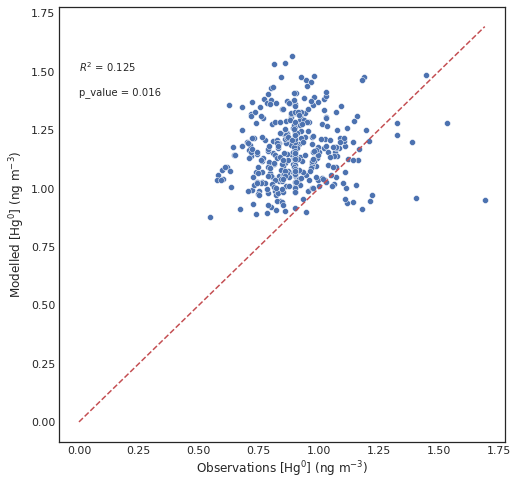

In [38]:
plt.figure(figsize=(8,8))
sns.scatterplot(obsNC.value,GC_asgmNC.SpeciesConc_Hg0, ci =95)
plt.xlabel('Observations [Hg$^0$] (ng m$^{-3}$)')
plt.ylabel('Modelled [Hg$^0$] (ng m$^{-3}$)')
plt.plot([0,myMax],[0,myMax],c='r',linestyle = 'dashed')
plt.annotate("$R^2$ = {:.3f}".format(corr[0]), (0, 1.5))
plt.annotate("p_value = {:.3f}".format(corr[1]), (0, 1.4))
# To show the plot
plt.show()

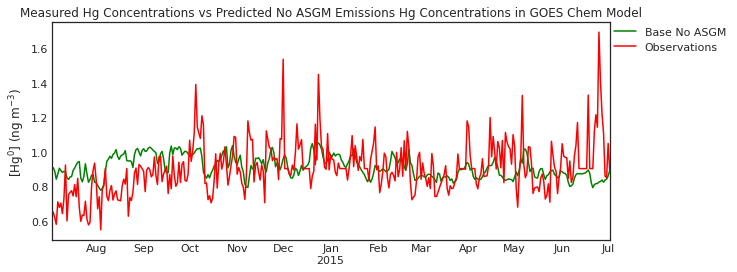

In [164]:
fig=plt.figure(figsize=(10,4))
plt.title('Measured Hg Concentrations vs Predicted No ASGM Emissions Hg Concentrations in GOES Chem Model')
GCno_asgm.SpeciesConc_Hg0.plot(color = 'green',label = 'Base No ASGM')
obsNC.value.plot(color = 'red',label = 'Observations')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('')
#plt.gca().axes.get_xaxis().set_visible(False)
plt.show()
fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_ObsvNoASGMv1.png')

In [134]:
GC_asgmHiRes=getHiRes()[:end_date]

In [135]:
obsNC=obsNC[:end_date]
GCno_asgm=GCno_asgm[:end_date]
GC_asgm=GC_asgm[:end_date]

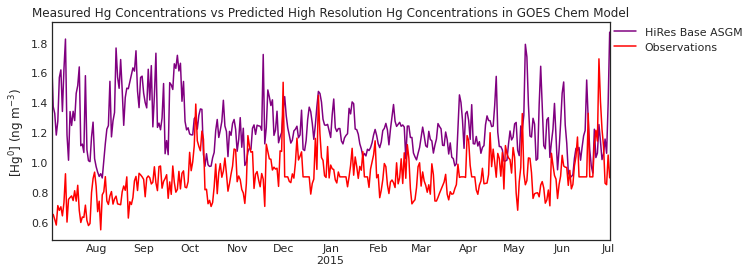

In [165]:
fig=plt.figure(figsize=(10,4))
plt.title('Measured Hg Concentrations vs Predicted High Resolution Hg Concentrations in GOES Chem Model')
GC_asgmHiRes.SpeciesConc_Hg0.plot(color = 'purple',label = 'HiRes Base ASGM')
obsNC.value.plot(color = 'red',label = 'Observations')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('')
plt.show()
fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_HiResASGMvObsv1.png')

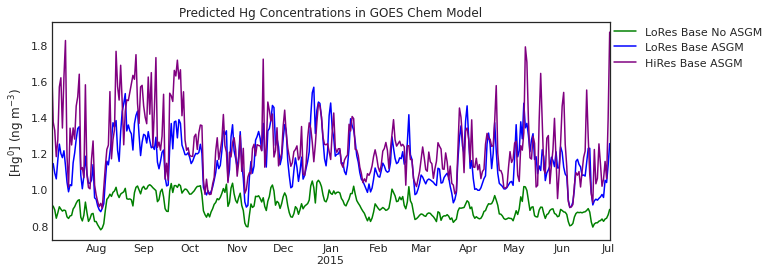

In [166]:
fig=plt.figure(figsize=(10,4))
plt.title('Predicted Hg Concentrations in GOES Chem Model')
GCno_asgm.SpeciesConc_Hg0.plot(color = 'green',label = 'LoRes Base No ASGM')
GC_asgm.SpeciesConc_Hg0.plot(color = 'blue',label = 'LoRes Base ASGM')
GC_asgmHiRes.SpeciesConc_Hg0.plot(color = 'purple',label = 'HiRes Base ASGM')
#get_detrended_obs().value.plot(color = 'red',label = 'Observations')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('')
plt.show()
fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_all.png')

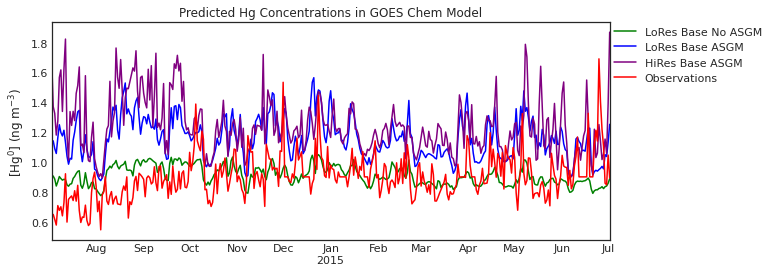

In [167]:
fig=plt.figure(figsize=(10,4))
plt.title('Predicted Hg Concentrations in GOES Chem Model')
GCno_asgm.SpeciesConc_Hg0.plot(color = 'green',label = 'LoRes Base No ASGM')
GC_asgm.SpeciesConc_Hg0.plot(color = 'blue',label = 'LoRes Base ASGM')
GC_asgmHiRes.SpeciesConc_Hg0.plot(color = 'purple',label = 'HiRes Base ASGM')
obsNC.value.plot(color = 'red',label = 'Observations')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('')
plt.show()
fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_allvObs.png')

### Correlation with all

In [139]:

corr_LR_asgm=stats.spearmanr(obsNC.value, GC_asgm.SpeciesConc_Hg0)
corr_LR_Nasgm=stats.spearmanr(obsNC.value, GCno_asgm.SpeciesConc_Hg0)
corr_HR_asgm=stats.spearmanr(obsNC.value, GC_asgmHiRes.SpeciesConc_Hg0)
print(f"Low res No ASGM vs Obs:{corr_LR_Nasgm[0]} \n")
print(f"Low res ASGM vs Obs:{corr_LR_asgm[0]} \n")
print(f"High res ASGM vs Obs:{corr_HR_asgm[0]} \n")

Low res No ASGM vs Obs:0.16322203459664245 

Low res ASGM vs Obs:0.124073818294455 

High res ASGM vs Obs:0.06437401660617735 



In [140]:
dfNC=obsNC[:]
dfNC['L_ResBase_No ASGM']=GCno_asgm.SpeciesConc_Hg0
dfNC['L_ResBase ASGM']=GC_asgm.SpeciesConc_Hg0
dfNC['H_ResBase_ASGM']=GC_asgmHiRes.SpeciesConc_Hg0
dfNC

,value,L_ResBase_No ASGM,L_ResBase ASGM,H_ResBase_ASGM
tstamp,,,,
2014-07-03,0.644308,0.911956,1.141870,1.691530
2014-07-04,0.651114,0.907401,1.142869,1.372548
2014-07-05,0.617688,0.887611,1.091087,1.326379
2014-07-06,0.579989,0.841053,1.058690,1.181803
2014-07-07,0.710160,0.870472,1.162876,1.274519
...,...,...,...,...
2015-06-28,1.107000,0.823827,0.955920,1.057068
2015-06-29,0.859547,0.836476,1.050984,1.155254
2015-06-30,0.849968,0.841379,1.038522,1.060115


In [123]:
dfNC.describe()

,value,L_ResBase_No ASGM,L_ResBase ASGM,H_ResBase_ASGM
count,365.000000,365.000000,365.000000,365.000000
mean,0.902031,0.911644,1.160192,1.241600
std,0.147964,0.063069,0.137956,0.186234
min,0.548148,0.776879,0.877226,0.895046
25%,0.814219,0.861088,1.053089,1.111275
50%,0.898857,0.902520,1.151208,1.219470
75%,0.970871,0.961748,1.250599,1.332599
max,1.691778,1.051066,1.565660,1.870308


In [124]:
head=['value','L_ResBase_No ASGM','L_ResBase ASGM','H_ResBase_ASGM']
for header in head:
    col=dfNC.describe()[header]
    print(f"{header} IQR :{col['75%']-col['25%']}")

value IQR :0.15665185451507568
L_ResBase_No ASGM IQR :0.10065943002700806
L_ResBase ASGM IQR :0.197509765625
H_ResBase_ASGM IQR :0.22132372856140137


## Plot of time series after detrending

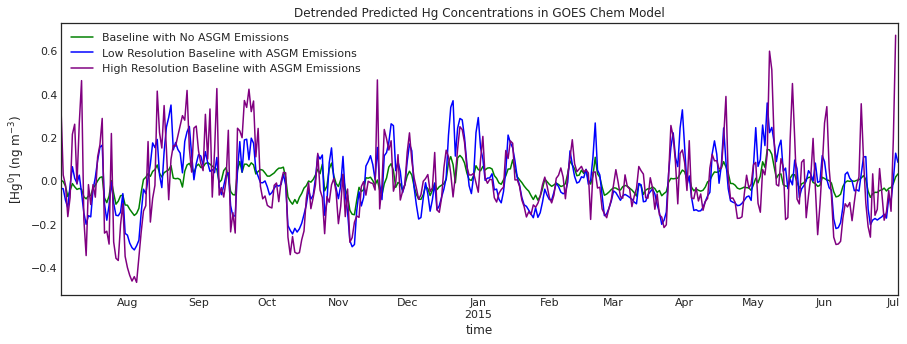

In [43]:
plt.figure(figsize=(15,5))
plt.title('Detrended Predicted Hg Concentrations in GOES Chem Model')
get_detrended_model(GCno_asgm).SpeciesConc_Hg0.plot(color = 'green',label = 'Baseline with No ASGM Emissions ')
get_detrended_model(GC_asgm).SpeciesConc_Hg0.plot(color = 'blue',label = 'Low Resolution Baseline with ASGM Emissions ')
get_detrended_model(GC_asgmHiRes).SpeciesConc_Hg0.plot(color = 'purple',label = 'High Resolution Baseline with ASGM Emissions ')
#get_detrended_obs().value.plot(color = 'red',label = 'Observations')
plt.legend()
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()

# Sensitivity of Hg Concentration at CHC to changes in individual grid box

In [44]:
def initEmcee(RefSiteNum):
    #RefSiteNum = RefSiteNum
    regions = ['spun','npun','mdd','aqp','apr']
    ConstantTerm=getConst(RefSiteNum,regions)
    Spun_sigs=multiSiteSignal('spun',RefSiteNum).to_numpy()
    Npun_sigs = multiSiteSignal('npun',RefSiteNum).to_numpy()
    Mdd_sigs =multiSiteSignal('mdd',RefSiteNum).to_numpy()
    Aqp_sigs = multiSiteSignal('aqp',RefSiteNum).to_numpy()
    Apr_sigs =multiSiteSignal('apr',RefSiteNum).to_numpy()
    return ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs

In [45]:
 def model(theta):
    """Dummy model used here for Bayesian analysis (replace with actual GEOS-Chem function):
        Model: Y = f(theta) where theta is a set of parameters:
            Emissions: E1, E2, and E3
    """
    Espun, Enpun, Emdd, Eaqp, Eapr=theta

    modified=ConstantTerm+ (Espun*Spun_sigs) + (Enpun*Npun_sigs) + (Emdd*Mdd_sigs) +(Eaqp*Aqp_sigs) +Eapr*Apr_sigs 

    summary =pd.DataFrame(modified)
    model_out = summary

    return model_out

In [46]:
ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs=initEmcee(0)
initial = np.array([7.75, 11.66, 54, 23.86, 10])

In [47]:
model_df=getLoRes()

In [48]:
model_df['Modified']=model(initial)[0].values
model_df.index = pd.to_datetime(model_df.index)
model_dfNC=model_df.loc[:'2015-7-03']
model_dfNC

,SpeciesConc_Hg0,Modified
time,,
2014-07-03,1.141870,1.168971
2014-07-04,1.142869,1.199793
2014-07-05,1.091087,1.140313
2014-07-06,1.058690,1.105796
2014-07-07,1.162876,1.258400
...,...,...
2015-06-29,1.050984,1.064470
2015-06-30,1.038522,1.061898
2015-07-01,1.134310,1.223180


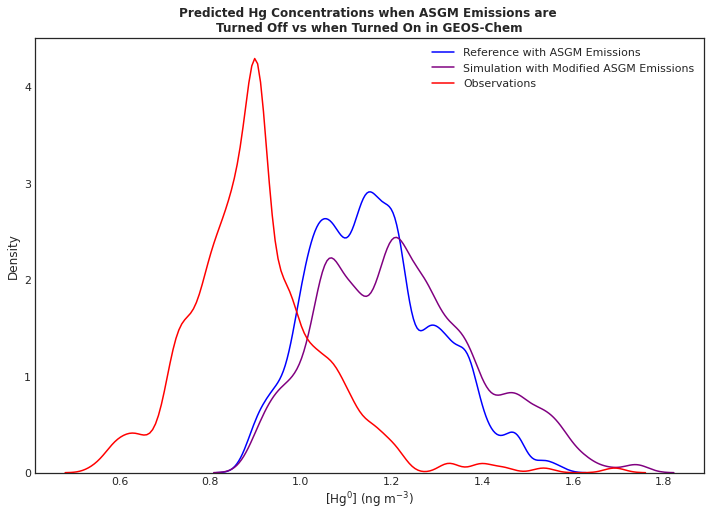

In [49]:

plt.figure(figsize=(12,8))
plt.title('Predicted Hg Concentrations when ASGM Emissions are \nTurned Off vs when Turned On in GEOS-Chem',size=12,fontweight="bold")
sns.kdeplot(data=model_dfNC.SpeciesConc_Hg0, fill=False,color = 'blue',label = 'Reference with ASGM Emissions ',bw_adjust=0.5)
sns.kdeplot(data=model_dfNC.Modified, fill=False,color = 'purple',label = 'Simulation with Modified ASGM Emissions',bw_adjust=0.5)
sns.kdeplot(data=obsNC.value, fill=False,color = 'red',label = 'Observations',bw_adjust=0.5)
plt.legend(loc='best')
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()

In [50]:
modified=pd.DataFrame(model_dfNC.Modified)
model_df_scaled=scaler.fit_transform(modified)

NameError: name 'obsNC_scaled' is not defined

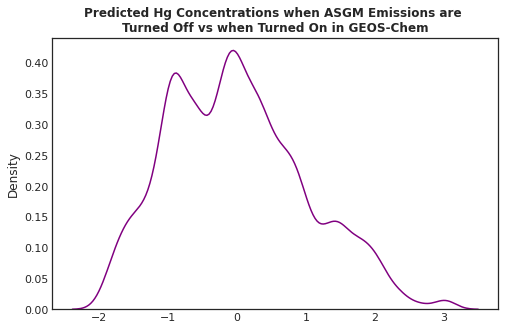

In [51]:
fig, ax = plt.subplots(figsize=(8,5))
#plt.figure(figsize=(8,5))
plt.title('Predicted Hg Concentrations when ASGM Emissions are \nTurned Off vs when Turned On in GEOS-Chem',size=12,fontweight="bold")
sns.kdeplot(data=model_df_scaled.squeeze(),ax =ax,color = 'purple', fill=False,label ='Reference Simulation \nwith ASGM Emissions',bw_adjust=0.5)
sns.kdeplot(data=obsNC_scaled.squeeze(),ax =ax,color = 'red', fill=False,label = 'Observations',bw_adjust=0.5)
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()